### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Reading data

In [2]:
# Reading the data with pandas
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Selecting all columns without the first column
train = train_df.iloc[: ,1:]
test = test_df.iloc[:, 1:]

In [5]:
train

,Capsaicin level,Pungent odor,Vitamin C,Water,Light transmittance,Temp storage,Time storage,Dihydrocapsaicin level,Fibre density,Protein density,Saturated fatty acids,Monounsaturated fatty acids,Polyunsaturated fatty acids,Scoville score
0,166.7,6.8,0.0,77.95,32.4,7.5,4.0,32.4,13.56,1.05,24.47,0.67,0.41,4051080.0
1,170.4,5.7,0.0,74.06,39.0,4.7,52.0,47.1,8.58,0.93,22.42,1.10,0.22,4258252.0
2,212.5,3.1,0.0,88.27,22.4,5.9,1.0,161.7,13.57,1.02,22.15,4.08,0.50,2678566.0
3,216.0,1.0,0.0,80.01,22.4,6.4,31.0,10.2,21.27,0.98,19.82,0.57,0.04,801070.0
4,146.5,1.3,141.0,78.64,28.8,4.6,38.0,20.7,5.83,0.96,23.95,0.54,0.32,2680508.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,148.1,5.5,0.0,71.90,35.4,6.9,38.0,10.2,17.44,0.99,16.95,1.68,0.10,1429060.0
614,120.9,1.0,125.1,71.62,36.3,8.1,38.0,14.8,27.63,1.10,15.79,6.36,1.86,2582749.0
615,82.0,1.0,125.2,76.20,33.9,8.0,37.0,50.8,12.88,1.01,16.52,0.55,0.29,2022090.0
616,277.9,3.6,0.0,79.05,32.7,4.7,34.0,20.7,6.05,0.92,13.57,1.36,0.58,4271200.0


In [6]:
test

,Capsaicin level,Pungent odor,Vitamin C,Water,Light transmittance,Temp storage,Time storage,Dihydrocapsaicin level,Fibre density,Protein density,Saturated fatty acids,Monounsaturated fatty acids,Polyunsaturated fatty acids
0,134.1,3.5,0.0,88.27,22.4,5.9,15.0,161.7,20.15,0.93,23.19,0.51,0.07
1,200.6,5.2,0.0,75.87,35.9,6.0,30.0,11.9,5.16,0.94,14.32,0.10,0.04
2,219.3,5.2,0.0,72.14,48.0,6.0,30.0,20.7,3.92,0.96,7.94,3.14,0.29
3,200.6,5.2,0.0,75.87,35.9,6.0,30.0,10.2,18.17,0.92,23.31,0.71,0.19
4,50.9,1.0,179.0,83.16,31.7,4.3,50.0,20.7,16.84,0.91,11.55,1.65,0.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,98.0,1.0,174.2,74.75,36.0,7.5,33.0,14.8,3.31,0.92,24.90,1.95,0.07
408,70.1,3.6,0.0,81.19,22.4,6.1,48.0,11.9,9.60,1.00,17.77,0.16,0.35
409,138.8,3.3,81.8,84.67,32.9,5.5,16.0,20.7,3.94,0.94,7.28,0.14,3.22
410,243.5,3.4,0.0,73.63,41.6,4.7,53.0,47.1,16.12,1.17,13.38,3.46,0.48


### Data exploration and visualisation

Capsaicin level                0
Pungent odor                   0
Vitamin C                      0
Water                          0
Light transmittance            0
Temp storage                   0
Time storage                   0
Dihydrocapsaicin level         0
Fibre density                  0
Protein density                0
Saturated fatty acids          0
Monounsaturated fatty acids    0
Polyunsaturated fatty acids    0
Scoville score                 0
dtype: int64
------------------
Capsaicin level                0
Pungent odor                   0
Vitamin C                      0
Water                          0
Light transmittance            0
Temp storage                   0
Time storage                   0
Dihydrocapsaicin level         0
Fibre density                  0
Protein density                0
Saturated fatty acids          0
Monounsaturated fatty acids    0
Polyunsaturated fatty acids    0
dtype: int64


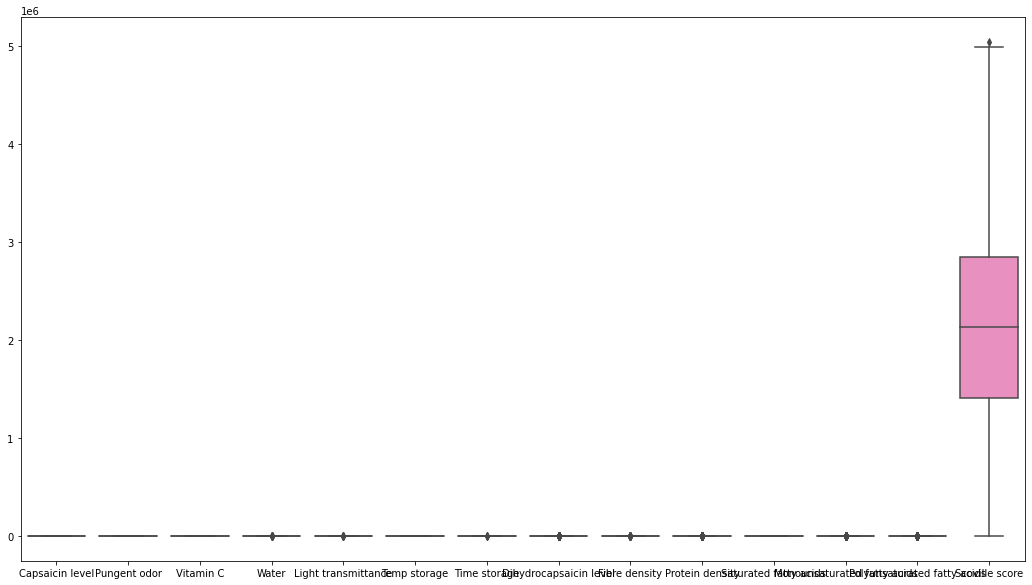

In [3]:
# Check for missing values
print(train.isna().sum())
print('------------------')
print(test.isna().sum())

#Created a boxplot for each numerical column to check for outliers
fig, ax = plt.subplots(figsize=(18,10))
sns.boxplot(data=train, ax=ax)
plt.show()

### Data cleaning

In [11]:
# Calculate the Z-scores for all the columns
z_scores = np.abs(stats.zscore(train))
# Set a threshold for the Z-score to identify outliers
threshold = 5
# Get the indices of the rows that contain outliers
outliers_indices = np.where(np.any(z_scores > threshold, axis=1))
# Remove the outliers from the dataset
train_clean = train.drop(outliers_indices[0], axis=0).reset_index(drop=True)
train_clean.shape

(597, 14)

### Data exploration after cleaning

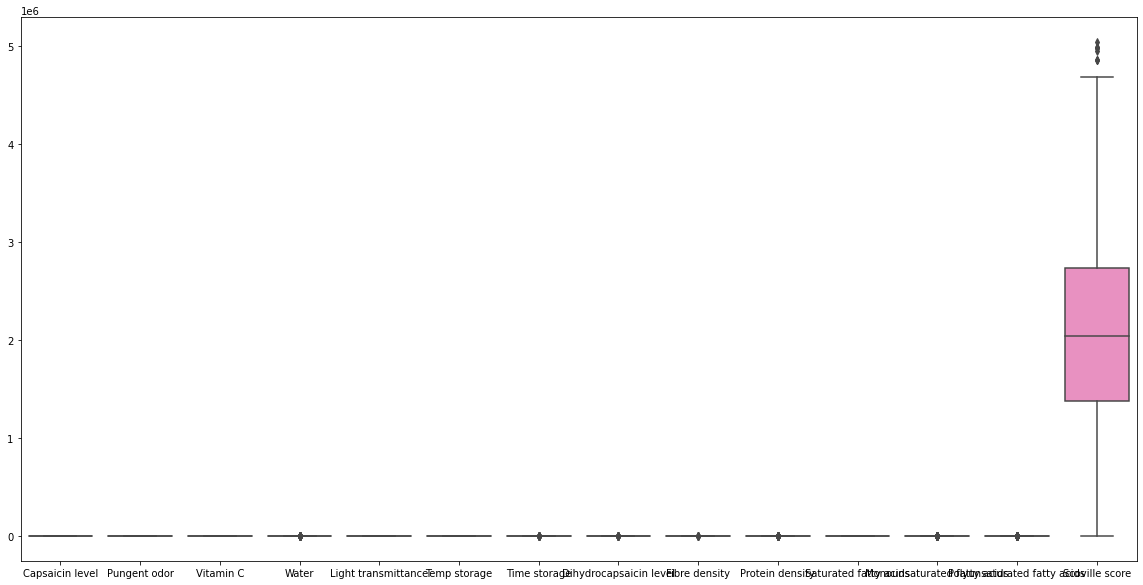

In [6]:
#Created a boxplot for each numerical column to check for outliers
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=train_clean, ax=ax)
plt.show()

### Data preprocessing

In [12]:
#Defining the target value for the modelling
X = train_clean.drop('Scoville score', axis=1)
y = train_clean['Scoville score']

In [14]:
X

,Capsaicin level,Pungent odor,Vitamin C,Water,Light transmittance,Temp storage,Time storage,Dihydrocapsaicin level,Fibre density,Protein density,Saturated fatty acids,Monounsaturated fatty acids,Polyunsaturated fatty acids
0,166.7,6.8,0.0,77.95,32.4,7.5,4.0,32.4,13.56,1.05,24.47,0.67,0.41
1,170.4,5.7,0.0,74.06,39.0,4.7,52.0,47.1,8.58,0.93,22.42,1.10,0.22
2,216.0,1.0,0.0,80.01,22.4,6.4,31.0,10.2,21.27,0.98,19.82,0.57,0.04
3,146.5,1.3,141.0,78.64,28.8,4.6,38.0,20.7,5.83,0.96,23.95,0.54,0.32
4,149.2,5.3,0.0,81.19,22.4,5.9,23.0,20.7,6.74,1.01,14.13,0.12,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,148.1,5.5,0.0,71.90,35.4,6.9,38.0,10.2,17.44,0.99,16.95,1.68,0.10
593,120.9,1.0,125.1,71.62,36.3,8.1,38.0,14.8,27.63,1.10,15.79,6.36,1.86
594,82.0,1.0,125.2,76.20,33.9,8.0,37.0,50.8,12.88,1.01,16.52,0.55,0.29
595,277.9,3.6,0.0,79.05,32.7,4.7,34.0,20.7,6.05,0.92,13.57,1.36,0.58


In [16]:
y

0      4051080.0
1      4258252.0
2       801070.0
3      2680508.0
4      2361334.0
         ...    
592    1429060.0
593    2582749.0
594    2022090.0
595    4271200.0
596    2339322.0
Name: Scoville score, Length: 597, dtype: float64

#### Train test split

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=None)

### Modelling

#### Data pipeline with regression model

Root mean squared error (RMSE) - train: 277282.199, test: 491749.865
Mean squared error (MSE)  - train: 76885418072.335, test: 241817930198.141
R^2                       - train:  0.930, test: 0.753
Mean absolute error (MAE) - train: 217088.923,  test:  379929.716


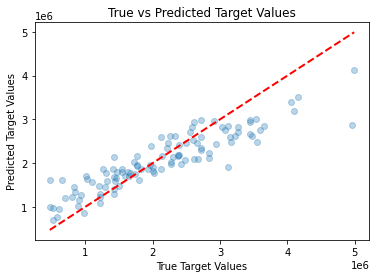

,Id,Scoville score
0,0,2.617439e+06
1,1,2.851582e+06
2,2,3.455868e+06
3,3,2.548887e+06
4,4,1.175923e+06
...,...,...
407,407,1.676599e+06
408,408,8.741212e+05
409,409,2.401455e+06
410,410,3.589922e+06


In [9]:
# Create a preprocessing and model pipeline
preprocessor = StandardScaler()
model = RandomForestRegressor(random_state=42)

pipeline = Pipeline([("preprocessor", preprocessor), ("model", model)])

# Set up the hyperparameters for the random forest regressor
params = {
    "model__n_estimators": [50, 100, 200],
    "model__max_depth": [10, 15, 20],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [2, 4, 8],
    "model__max_features": ['sqrt', 'log2'],
}

# Use cross-validation and hyperparameter tuning to find the best parameters
cv = KFold(n_splits=10, shuffle=True, random_state=42)

gs = GridSearchCV(pipeline,
                  param_grid=params,
                  scoring="neg_mean_squared_error",
                  cv=cv, n_jobs=-1)

gs.fit(X_train, y_train)

# Best model
best_model = gs.best_estimator_

# Make predictions
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)


print('Root mean squared error (RMSE) - train: %.3f, test: %.3f' % (
        np.sqrt(mean_squared_error(y_train, y_pred_train)),
        np.sqrt(mean_squared_error(y_test, y_pred_test))))

print('Mean squared error (MSE)  - train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_pred_train),
        mean_squared_error(y_test, y_pred_test)))

print('R^2                       - train:  %.3f, test: %.3f' % (
        r2_score(y_train, y_pred_train),
        r2_score(y_test, y_pred_test)))

print('Mean absolute error (MAE) - train: %.3f,  test:  %.3f' % (
        mean_absolute_error(y_train, y_pred_train),
        mean_absolute_error(y_test, y_pred_test)))


# Make predictions on the actual test data
test_predictions = best_model.predict(test)

# Scatter plot of true vs predicted target values
plt.scatter(y_test, y_pred_test, alpha=0.3)
plt.xlabel('True Target Values')
plt.ylabel('Predicted Target Values')
plt.title('True vs Predicted Target Values')

# Add a reference line for perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)

plt.show()

# Save predictions to a CSV file
submission = pd.DataFrame({'Id': test.index, 'Scoville score': test_predictions})
submission.to_csv('sample_submission.csv', index=False)
submission

##### Binning train target values

Can be performed with ex. pandas.qcut or pandas.cut

```python
n_bins = 10
y_train_binned = pd.cut(y_train, n_bins, labels=False) # or
y_train_binned = pd.qcut(y_train, n_bins, labels=False) 
```

Root mean squared error (RMSE) - train: 2456339.405, test: 2212604.820
Mean squared error (MSE)  - train: 6033603272911.729, test: 4895620088615.700
R^2                       - train:  -4.249, test: -3.998
Mean absolute error (MAE) - train: 2210030.413,  test:  1978891.033


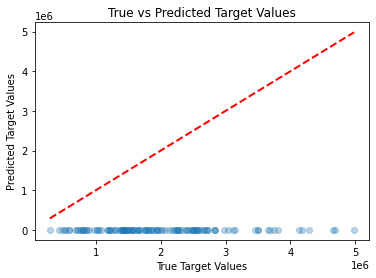

,Id,Scoville score
0,0,0
1,1,1
2,2,1
3,3,0
4,4,0
...,...,...
407,407,0
408,408,0
409,409,0
410,410,1


In [54]:
n_bins = 2
y_train_binned = pd.cut(y_train, n_bins, labels=False)

# Preprocessor
preprocessor = StandardScaler()

# Base model
base_model = KNeighborsClassifier()

# The Bagging classifier
bagging_classifier = BaggingClassifier(estimator=base_model, random_state=42)

# Create a pipeline
pipeline = Pipeline([('preprocessor', preprocessor), ('model', bagging_classifier)])

# Parameters for the ensemble model
params = {
    "model__estimator__n_neighbors": range(1, 31),
    "model__estimator__weights": ['uniform', 'distance'],
    "model__estimator__algorithm": ['ball_tree', 'kd_tree', 'brute', 'auto'],
    "model__estimator__p": [1, 2, 3, 4],
    "model__n_estimators": range(10, 101, 10),
    "model__max_samples": np.arange(0.1, 1.1, 0.1),
    "model__max_features": np.arange(0.1, 1.1, 0.1),
    "model__bootstrap": [True, False],
    "model__bootstrap_features": [True, False]
}

cv = KFold(n_splits=10, shuffle=True, random_state=42)

rs = RandomizedSearchCV(pipeline,
                        params,
                        n_iter = 30,
                        scoring='neg_mean_squared_error',
                        cv=cv,
                        n_jobs=-1)

rs.fit(X_train, y_train_binned)

# Best model
best_model = rs.best_estimator_

# Make predictions
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)


print('Root mean squared error (RMSE) - train: %.3f, test: %.3f' % (
        np.sqrt(mean_squared_error(y_train, y_pred_train)),
        np.sqrt(mean_squared_error(y_test, y_pred_test))))

print('Mean squared error (MSE)  - train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_pred_train),
        mean_squared_error(y_test, y_pred_test)))

print('R^2                       - train:  %.3f, test: %.3f' % (
        r2_score(y_train, y_pred_train),
        r2_score(y_test, y_pred_test)))

print('Mean absolute error (MAE) - train: %.3f,  test:  %.3f' % (
        mean_absolute_error(y_train, y_pred_train),
        mean_absolute_error(y_test, y_pred_test)))


# Make predictions on the actual test data
test_predictions = best_model.predict(test)

# Scatter plot of true vs predicted target values
plt.scatter(y_test, y_pred_test, alpha=0.3)
plt.xlabel('True Target Values')
plt.ylabel('Predicted Target Values')
plt.title('True vs Predicted Target Values')

# Add a reference line for perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)

plt.show()

# Save predictions to a CSV file
submission = pd.DataFrame({"Id": test.index, "Scoville score": test_predictions})
submission.to_csv("sample_submission.csv", index=False)
submission

# The issues with binning continous values to categorical is that we can lose alot of information
# The more you increase the bins, the more information you can lose
# Which affects the performance of your model
# Thats why it is preferable to use regression models for continous tasks

#### Other models used for Kaggle submission

Best parameters found:
{'model__random_forest__n_estimators': 200, 'model__random_forest__max_depth': 10, 'model__final_estimator__alpha': 0.1, 'model__bagging__n_estimators': 100, 'model__bagging__max_samples': 0.5, 'model__bagging__max_features': 1.0, 'model__adaboost__n_estimators': 50, 'model__adaboost__learning_rate': 0.001}
Root mean squared error (RMSE) - train: 168939.314, test: 337110.532
Mean squared error (MSE)  - train: 28540491823.066, test: 113643510627.945
R^2                       - train:  0.975, test: 0.884
Mean absolute error (MAE) - train: 132407.425,  test:  269981.740


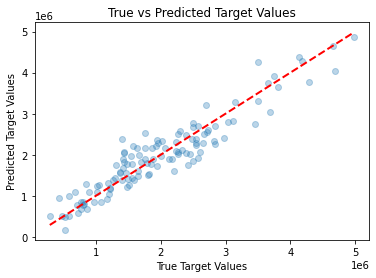

,Id,Scoville score
0,0,3.561268e+06
1,1,2.179501e+06
2,2,4.408498e+06
3,3,1.924629e+06
4,4,3.238002e+05
...,...,...
407,407,1.655059e+06
408,408,4.360929e+05
409,409,2.681655e+06
410,410,4.033066e+06


In [22]:
from sklearn.linear_model import Ridge, Lasso

# Preprocessor
preprocessor = StandardScaler()

# Base models
rf_regressor = RandomForestRegressor(random_state=42)
ada_regressor = AdaBoostRegressor(random_state=42)
bagging_regressor = BaggingRegressor(estimator=LinearRegression(), random_state=42)


# Assigning a meta model for the stacking regressor
#meta_model=LinearRegression()
#meta_model = Ridge(alpha=1.0, random_state=42)
meta_model = Lasso(random_state=42)


# Stacking ensemble model
base_models = [("random_forest", rf_regressor), ("adaboost", ada_regressor), ("bagging", bagging_regressor)]
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Create a pipeline
pipeline = Pipeline([("preprocessor", preprocessor), ("model", stacking_regressor)])

# Set up the hyperparameters for the ensemble model
params = {
    "model__random_forest__n_estimators": [50, 100, 200],
    "model__random_forest__max_depth": [10, 15, 20],
    "model__adaboost__n_estimators": [50, 100, 200],
    "model__adaboost__learning_rate": [0.001, 0.01, 0.1, 1],
    "model__bagging__n_estimators": [50, 100, 200],
    "model__bagging__max_samples": [0.5, 1.0],
    "model__bagging__max_features": [0.5, 1.0],
    "model__final_estimator__alpha": [0.01, 0.1, 1, 10]
}

# Perform hyperparameter tuning
cv = KFold(n_splits=10, shuffle=True, random_state=42)

rs = RandomizedSearchCV(pipeline,
                        params,
                        n_iter = 30,
                        scoring="neg_mean_squared_error",
                        cv=cv,
                        n_jobs=-1)

rs.fit(X_train, y_train)


print("Best parameters found:")
print(rs.best_params_)


# Best model
best_model = rs.best_estimator_

# Make predictions
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)


print('Root mean squared error (RMSE) - train: %.3f, test: %.3f' % (
        np.sqrt(mean_squared_error(y_train, y_pred_train)),
        np.sqrt(mean_squared_error(y_test, y_pred_test))))

print('Mean squared error (MSE)  - train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_pred_train),
        mean_squared_error(y_test, y_pred_test)))

print('R^2                       - train:  %.3f, test: %.3f' % (
        r2_score(y_train, y_pred_train),
        r2_score(y_test, y_pred_test)))

print('Mean absolute error (MAE) - train: %.3f,  test:  %.3f' % (
        mean_absolute_error(y_train, y_pred_train),
        mean_absolute_error(y_test, y_pred_test)))


# Make predictions on the actual test data
test_predictions = best_model.predict(test)

# Scatter plot of true vs predicted target values
plt.scatter(y_test, y_pred_test, alpha=0.3)
plt.xlabel('True Target Values')
plt.ylabel('Predicted Target Values')
plt.title('True vs Predicted Target Values')

# Add a reference line for perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)

plt.show()

# Save predictions to a CSV file
submission = pd.DataFrame({"Id": test.index, "Scoville score": test_predictions})
submission.to_csv("sample_submission.csv", index=False)
submission